## Librerias a utilizar

In [1]:
import librosa
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import pyaudio #Libreria que ayuda para obtener el audio y darle formato
import wave  #Permite leer y escribir archivos wav
import winsound #Permite acceder a la maquinaria básica de reproducción de sonidos proporcionada por la plataformas Windows.
import scipy.io.wavfile as waves #libreria importante para los datos del audio
import scipy.fftpack as fourier #libreria para pasar al dominio de la frecuencia de forma sencilla

## Definicion de nombre de carpetas

In [2]:
WAVEFORM_path_export = 'waveform'
SPECTROGRAM_path_export='spectogram'
GREYSPECTROGRAM_path_export='grey spectrogram'
MELSPECTROGRAM_path_export='mel spectrogram'
CHROMAGRAM_path_export='chromagram'
MFCC_path_export='mfcc'
DELTA_MFCC_path_export='delta mfccs'
DELTA2_MFCC_path_export='delta2 mfccs'
FvsA_path_export='FrequencyAmplitude'
AMPLITUDEENV_path_export='amplitude envelope'
RMSE_path_export='root mean square energy'
ZCR_path_export='zero croosing rate'
BER_path_export='band energy ratio'
SpecCent_path_export='spectral centroid'
Bandwidth_path_export='bandwidth'
SpecContrast_path_export='spectral contrast'
SpecRollOff_path_export='spectral rolloff'
PolyFeatures_path_export='poly features'
Tonnetz_path_export='tonnetz'
clip = (r'C:\Users\BHC4SLP\Documents\Python Projects\Proyecto2-GraficaAudio\PruebaAudio1.wav')

## Definicion de funciones

In [3]:
def LoadAudio_Turn2Decibels(clip):
    y, sr = librosa.load(clip) 
    D = librosa.stft(y) 
    # STFT of y 
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 
    #, ref=np.max

    return y,S_db,sr

In [4]:
def guardarimagen(path_export,NombreImag,fig):
    audio_filename = os.path.basename(os.path.normpath(clip)) 
    image_filename_to_save = str(audio_filename).replace(".wav", "-", 1) + NombreImag+".png" 
    if not os.path.exists(path_export): 
        os.makedirs(path_export) 
    fig.savefig(os.path.join(path_export,image_filename_to_save)) 

In [5]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [6]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [7]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

## Extracción de cualidades del audio

In [8]:
y,S_db,sr=LoadAudio_Turn2Decibels(clip)

## Waveform

[Text(0.5, 1.0, 'WAVEFORM')]

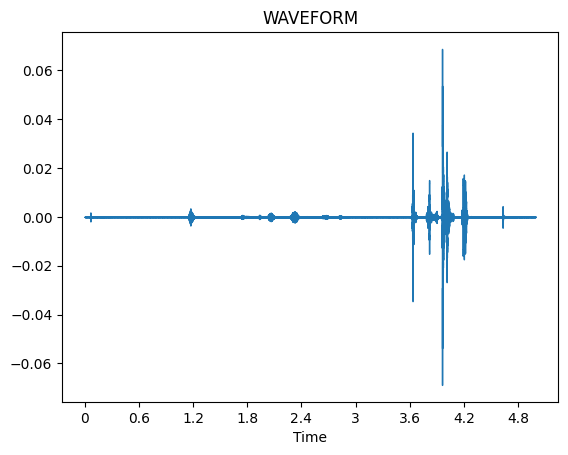

In [9]:
""" Waveform"""
# Simple WAVEFORM to check clip trimming accuracy 
fig, ax = plt.subplots() 
img = librosa.display.waveshow(y, sr=sr, axis='time') 
ax.set(title='WAVEFORM') 
#The first strips off any trailing slashes, the second gives you the last part of the path. 


In [10]:
guardarimagen(WAVEFORM_path_export,'waveform',fig)
plt.close()

## Amplitude Envelope


In [11]:
"""Amplitude envelope"""
FRAME_SIZE = 1024
HOP_LENGTH = 512

# number of frames in amplitude envelope
ae_y = fancy_amplitude_envelope(y, FRAME_SIZE, HOP_LENGTH)
len(ae_y)

215

[Text(0.5, 1.0, 'Amplitude envelope')]

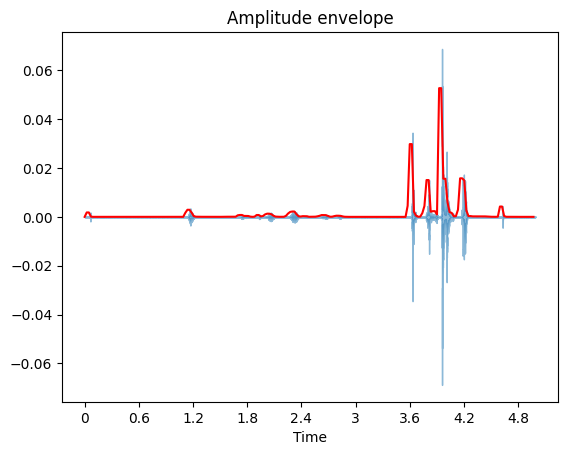

In [12]:
#Visualizing amplitud envelope
frames = range(len(ae_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

fig, ax = plt.subplots()
img=librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, ae_y, color="r")
#plt.ylim((-1, 1))
ax.set(title="Amplitude envelope")


In [13]:
guardarimagen(AMPLITUDEENV_path_export,'AmplitudEnvelope',fig)
plt.close()

## Root Mean Square Energy

[Text(0.5, 1.0, 'RMS energy')]

<Figure size 1500x1700 with 0 Axes>

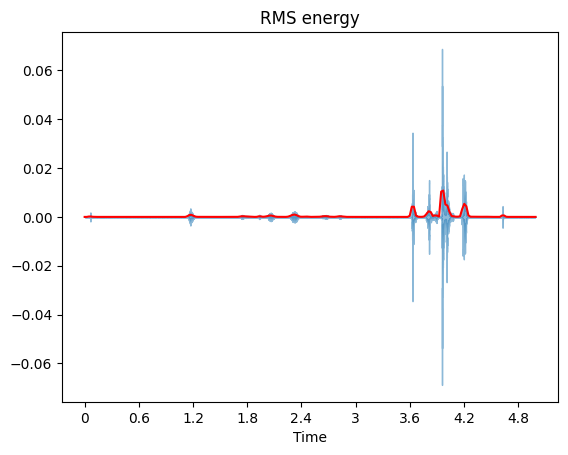

In [14]:
"""Root-mean-squared energy with Librosa"""
rms_y = librosa.feature.rms(y=y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
#Visualise RMSE + waveform
frames = range(len(rms_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
# rms energy is graphed in red
plt.figure(figsize=(15, 17))
fig, ax = plt.subplots()
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, rms_y, color="r")
#plt.ylim((-1, 1))
ax.set(title="RMS energy")


In [15]:
guardarimagen(RMSE_path_export,'RMSE',fig)
plt.close()

## Zero Crossing Rate

In [16]:
""" Zero crossing rate"""
#Zero-crossing rate with Librosa
zcr_y = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y.size

216

[Text(0.5, 1.0, 'Zero Croosing Rate')]

<Figure size 1500x1000 with 0 Axes>

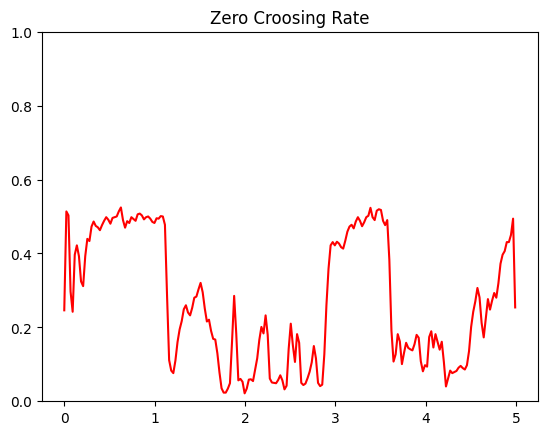

In [17]:
#Visualise zero-crossing rate with Librosa
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
plt.plot(t, zcr_y, color="r")
plt.ylim(0, 1)
#plt.show()
ax.set(title="Zero Croosing Rate")

In [18]:
guardarimagen(ZCR_path_export,'ZCR',fig)
plt.close()

## Frequency vs Amplitude Graph 

[Text(0.5, 1.0, 'Frequency vs Amplitude')]

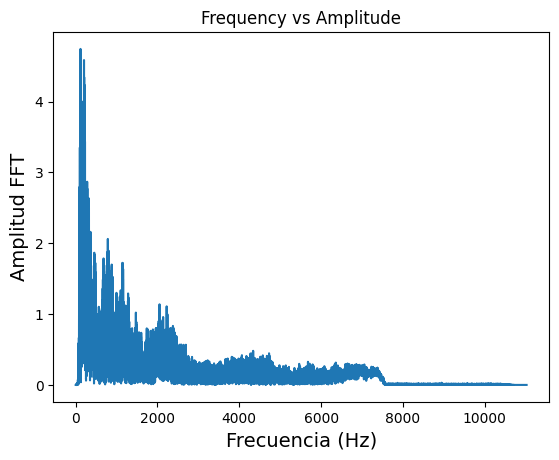

In [19]:
"""Frequency vs Amplitude"""
#Frequency vs amplitude graph
Audio_m=y[:] #Renombramos este arreglo como Audio_m
L=len(Audio_m)
gk=fourier.fft(Audio_m) #Transformada de fourier sobre el vector con los valores del audio
M_gk=abs(gk)            #Calculo de su valor absoluto de los nuevos valores tras la transformada
M_gk=M_gk[0:L//2]       #Funcion par asi que basta con analizar la mitad de los valores
F=(sr/L)*np.arange(0,L//2) #Se declara un arreglo hasta L medios
fig, bx=plt.subplots()
plt.plot(F,M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
#plt.show()
bx.set(title="Frequency vs Amplitude")

In [20]:
guardarimagen(FvsA_path_export,'FvsA',fig)
plt.close()

## Spectrogram

[Text(0.5, 1.0, 'SPECTROGRAM')]

<Figure size 2500x1000 with 0 Axes>

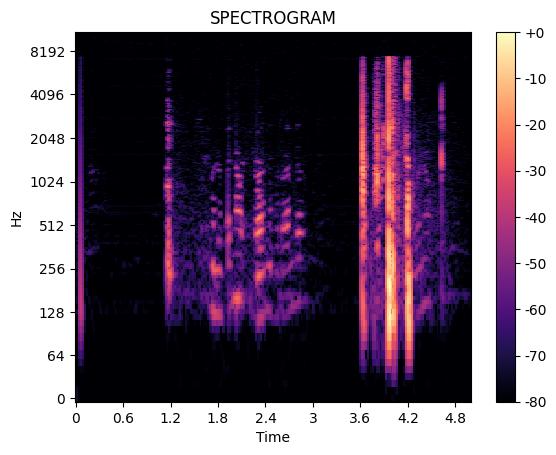

In [21]:
"""Spectrogram"""
# SPECTROGRAM representation - object-oriented interface 
plt.figure(figsize=(25, 10))
fig, ax = plt.subplots() 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear') 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log') 
plt.colorbar(format="%+2.f")
ax.set(title='SPECTROGRAM') 

In [22]:
guardarimagen(SPECTROGRAM_path_export,'Spectrogram',fig)
plt.close()

## Grey Spectrogram

[Text(0.5, 1.0, 'GREY SPECTROGRAM')]

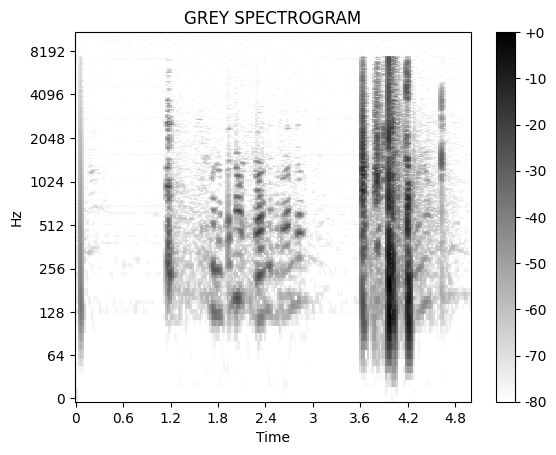

In [23]:
"""Grey Spectrogram"""
# SPECTROGRAM representation - object-oriented interface 
fig, ax = plt.subplots() 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear') 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', cmap='gray_r') 
plt.colorbar(format="%+2.f")
ax.set(title='GREY SPECTROGRAM') 

In [24]:
guardarimagen(GREYSPECTROGRAM_path_export,'Grey Spectrogram',fig)
plt.close()

## Mel Spectrogram

In [25]:
"""Mel Spectrogram"""
#Extracting Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=90)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

[Text(0.5, 1.0, 'MEL SPECTROGRAM')]

<Figure size 2500x1000 with 0 Axes>

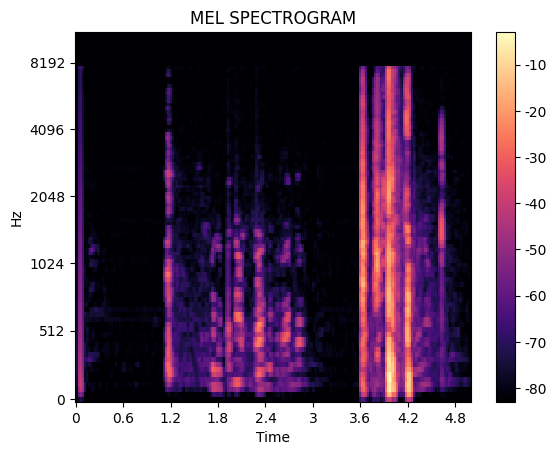

In [26]:
plt.figure(figsize=(25, 10))
fig, ax = plt.subplots() 
img=librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
ax.set(title='MEL SPECTROGRAM') 

In [27]:
guardarimagen(MELSPECTROGRAM_path_export,'Mel Spectrogram',fig)
plt.close()

## Chromogram

[Text(0.5, 1.0, 'CHROMAGRAM')]

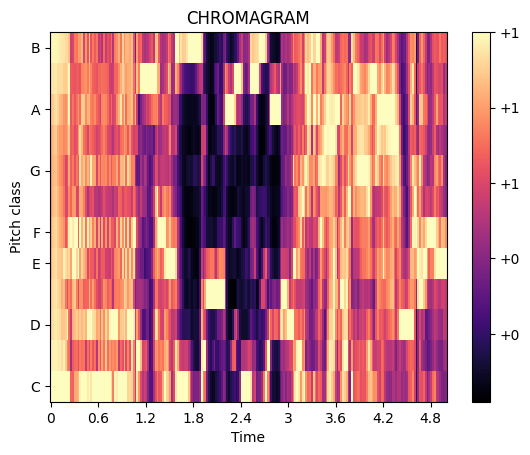

In [28]:
"""Chromogram"""
#CHROMAGRAM representation - object-oriented interface 
CHROMAGRAM = librosa.feature.chroma_cqt(y=y, sr=sr) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(CHROMAGRAM, y_axis='chroma', x_axis='time') 
plt.colorbar(format="%+2.f")
ax.set(title='CHROMAGRAM') 

In [29]:
guardarimagen(CHROMAGRAM_path_export,'Chromogram',fig)
plt.close()

## MFCCs

[Text(0.5, 1.0, 'Mel-frequency cepstral coefficients (MFCCs)')]

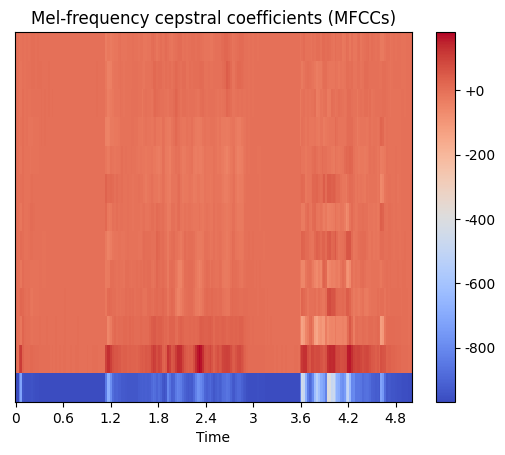

In [30]:
"""MFCCs"""
#MFCC representation - object-oriented interface 
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=1200) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(mfccs, x_axis='time') 
plt.colorbar(format="%+2.f")
ax.set(title='Mel-frequency cepstral coefficients (MFCCs)') 

In [31]:
guardarimagen(MFCC_path_export,'MFCCs',fig)
plt.close()

## Delta MFCCs

[Text(0.5, 1.0, 'Delta Mel-frequency cepstral coefficients (MFCCs)')]

<Figure size 2500x1000 with 0 Axes>

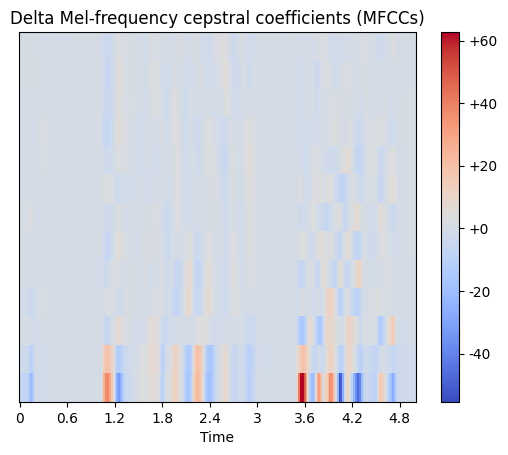

In [32]:
"""Delta MFCCs"""
delta_mfccs = librosa.feature.delta(mfccs)

plt.figure(figsize=(25, 10))
fig, ax = plt.subplots() 
img = librosa.display.specshow(delta_mfccs, x_axis='time',sr=sr) 
plt.colorbar(format="%+2.f")
ax.set(title='Delta Mel-frequency cepstral coefficients (MFCCs)') 

In [33]:
guardarimagen(DELTA_MFCC_path_export,'Delta MFCCs',fig)
plt.close()

## Delta2 MFCCs

[Text(0.5, 1.0, 'Delta2 Mel-frequency cepstral coefficients (MFCCs)')]

<Figure size 2500x1000 with 0 Axes>

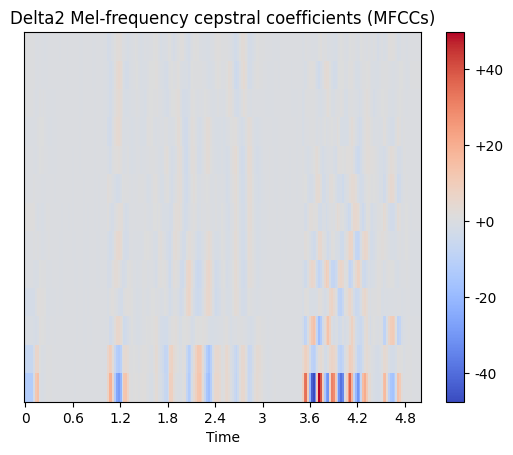

In [34]:
"""Delta2 MFCCs"""
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

plt.figure(figsize=(25, 10))
fig, ax = plt.subplots() 
img = librosa.display.specshow(delta2_mfccs, x_axis='time',sr=sr) 
plt.colorbar(format="%+2.f")
ax.set(title='Delta2 Mel-frequency cepstral coefficients (MFCCs)') 

In [35]:
guardarimagen(DELTA2_MFCC_path_export,'Delta2 MFCCs',fig)
plt.close()

## Band Energy Ratio

In [36]:
"""Band Energy Ratio"""
HOP_SIZE=512
y_spec = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

ber_y = band_energy_ratio(y_spec, 2000, sr)
len(ber_y)

216

[Text(0.5, 1.0, 'Band Energy Ratio')]

<Figure size 2500x1000 with 0 Axes>

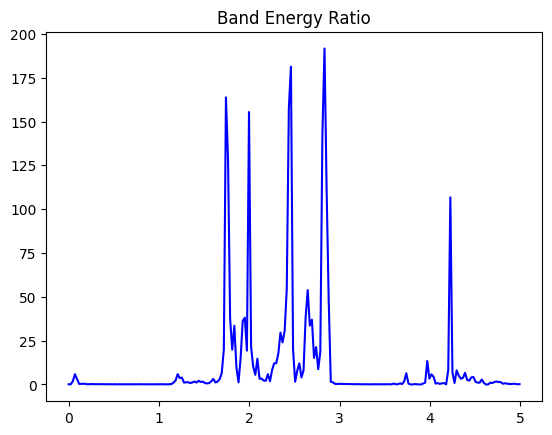

In [37]:
#Visualise Band Energy Ratio
frames = range(len(ber_y))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(25, 10))
fig, ax = plt.subplots()
plt.plot(t, ber_y, color="b")
#plt.ylim((0, 200))
ax.set(title="Band Energy Ratio")

In [38]:
guardarimagen(BER_path_export,'Band Energy Ratio',fig)
plt.close()

## Spectral Centroid

In [39]:
"""Spectral Centroid"""
sc_y = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_y.shape

#Visualising spectral centroid
len(t)

216

[Text(0.5, 1.0, 'Spectral Centroid')]

<Figure size 2500x1000 with 0 Axes>

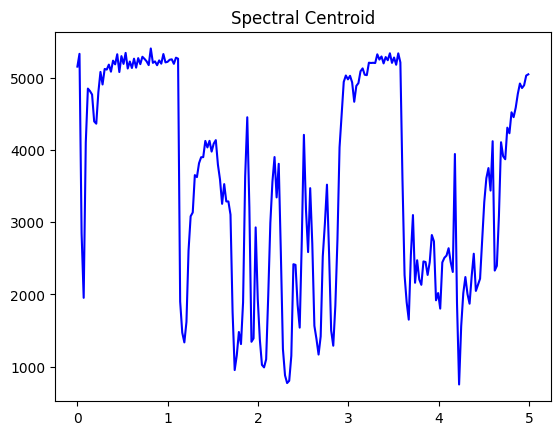

In [40]:
plt.figure(figsize=(25,10))
fig, ax = plt.subplots()
plt.plot(t, sc_y, color='b')
ax.set(title="Spectral Centroid")

In [41]:
guardarimagen(SpecCent_path_export,'Spectral Centroid',fig)
plt.close()

## Bandwidth

In [42]:
"""Bandwidth"""
#Spectral bandwidth with Librosa
ban_y = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_y.shape

(216,)

[Text(0.5, 1.0, 'Bandwidth')]

<Figure size 2500x1000 with 0 Axes>

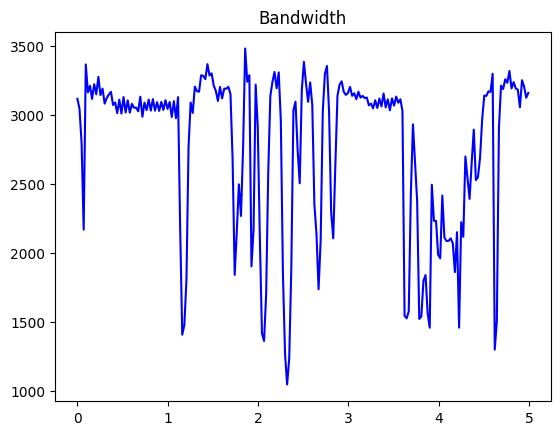

In [43]:
#Visualising spectral bandwidth
plt.figure(figsize=(25,10))
fig, ax = plt.subplots()
plt.plot(t, ban_y, color='b')
ax.set(title="Bandwidth")

In [44]:
guardarimagen(Bandwidth_path_export,'Bandwidth',fig)
plt.close()

## Spectral Contrast

In [45]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

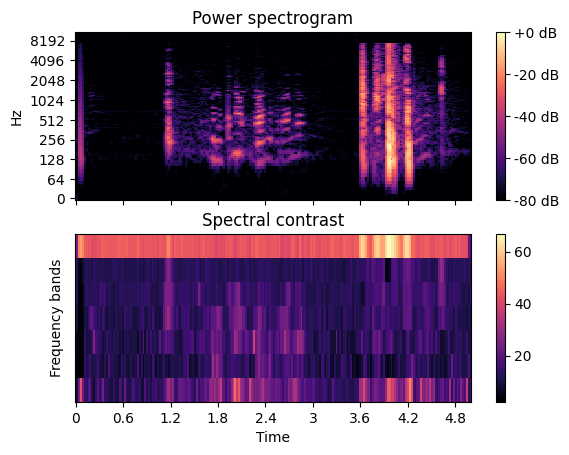

In [46]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [47]:
guardarimagen(SpecContrast_path_export,'Spectral Contrast',fig)
plt.close()

## Spectral Flatness

### From time-series input

In [48]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[5.08647144e-01, 4.44483489e-01, 4.24318276e-02, 2.87409369e-02,
        4.14769091e-02, 4.24223423e-01, 4.72670048e-01, 4.14127111e-01,
        2.55968273e-01, 2.24919990e-01, 3.46166760e-01, 4.42296922e-01,
        4.70558017e-01, 4.83423024e-01, 5.06864130e-01, 4.99715418e-01,
        5.10722995e-01, 5.29987991e-01, 5.22063434e-01, 5.40429533e-01,
        5.29160738e-01, 5.31045377e-01, 5.18694699e-01, 5.33318341e-01,
        5.14171839e-01, 5.35300434e-01, 5.36317945e-01, 5.35815775e-01,
        5.19308388e-01, 5.31520009e-01, 5.19773126e-01, 5.36815584e-01,
        5.30070364e-01, 5.24893105e-01, 5.13502181e-01, 5.28089345e-01,
        5.31080425e-01, 5.52980602e-01, 5.49623489e-01, 5.20396233e-01,
        5.19460618e-01, 5.48992991e-01, 5.15008867e-01, 5.35838068e-01,
        5.25594592e-01, 5.36450744e-01, 5.29624224e-01, 5.38435042e-01,
        5.99661916e-02, 2.57126405e-03, 1.36333238e-03, 1.41522672e-03,
        2.26035155e-03, 9.58785694e-03, 8.40956047e-02, 1.228185

### From spectrogram input

In [49]:
S, phase = librosa.magphase(librosa.stft(y))
librosa.feature.spectral_flatness(S=S)

array([[5.08647144e-01, 4.44483489e-01, 4.24318276e-02, 2.87409369e-02,
        4.14769091e-02, 4.24223423e-01, 4.72670048e-01, 4.14127111e-01,
        2.55968273e-01, 2.24919990e-01, 3.46166760e-01, 4.42296922e-01,
        4.70558017e-01, 4.83423024e-01, 5.06864130e-01, 4.99715418e-01,
        5.10722995e-01, 5.29987991e-01, 5.22063434e-01, 5.40429533e-01,
        5.29160738e-01, 5.31045377e-01, 5.18694699e-01, 5.33318341e-01,
        5.14171839e-01, 5.35300434e-01, 5.36317945e-01, 5.35815775e-01,
        5.19308388e-01, 5.31520009e-01, 5.19773126e-01, 5.36815584e-01,
        5.30070364e-01, 5.24893105e-01, 5.13502181e-01, 5.28089345e-01,
        5.31080425e-01, 5.52980602e-01, 5.49623489e-01, 5.20396233e-01,
        5.19460618e-01, 5.48992991e-01, 5.15008867e-01, 5.35838068e-01,
        5.25594592e-01, 5.36450744e-01, 5.29624224e-01, 5.38435042e-01,
        5.99661916e-02, 2.57126405e-03, 1.36333238e-03, 1.41522672e-03,
        2.26035155e-03, 9.58785694e-03, 8.40956047e-02, 1.228185

### From power spectrogram input

In [50]:
S_power = S ** 2
librosa.feature.spectral_flatness(S=S_power, power=1.0)

array([[5.08647144e-01, 4.44483489e-01, 4.24318276e-02, 2.87409369e-02,
        4.14769091e-02, 4.24223423e-01, 4.72670048e-01, 4.14127111e-01,
        2.55968273e-01, 2.24919990e-01, 3.46166760e-01, 4.42296922e-01,
        4.70558017e-01, 4.83423024e-01, 5.06864130e-01, 4.99715418e-01,
        5.10722995e-01, 5.29987991e-01, 5.22063434e-01, 5.40429533e-01,
        5.29160738e-01, 5.31045377e-01, 5.18694699e-01, 5.33318341e-01,
        5.14171839e-01, 5.35300434e-01, 5.36317945e-01, 5.35815775e-01,
        5.19308388e-01, 5.31520009e-01, 5.19773126e-01, 5.36815584e-01,
        5.30070364e-01, 5.24893105e-01, 5.13502181e-01, 5.28089345e-01,
        5.31080425e-01, 5.52980602e-01, 5.49623489e-01, 5.20396233e-01,
        5.19460618e-01, 5.48992991e-01, 5.15008867e-01, 5.35838068e-01,
        5.25594592e-01, 5.36450744e-01, 5.29624224e-01, 5.38435042e-01,
        5.99661916e-02, 2.57126405e-03, 1.36333238e-03, 1.41522672e-03,
        2.26035155e-03, 9.58785694e-03, 8.40956047e-02, 1.228185

## Spectral RollOff

In [51]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=y, sr=sr)

# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff

# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
rolloff_min

array([[ 43.06640625,  75.36621094,  96.89941406,  96.89941406,
         86.1328125 , 107.66601562, 118.43261719, 139.96582031,
        150.73242188, 118.43261719, 118.43261719, 150.73242188,
        150.73242188, 139.96582031, 139.96582031, 172.265625  ,
        150.73242188, 139.96582031, 161.49902344, 150.73242188,
        150.73242188, 150.73242188, 139.96582031, 150.73242188,
        150.73242188, 150.73242188, 150.73242188, 150.73242188,
        150.73242188, 139.96582031, 150.73242188, 204.56542969,
        139.96582031, 129.19921875, 150.73242188, 150.73242188,
        150.73242188, 139.96582031, 139.96582031, 150.73242188,
        150.73242188, 150.73242188, 150.73242188, 150.73242188,
        129.19921875, 172.265625  , 161.49902344, 161.49902344,
        172.265625  , 172.265625  , 183.03222656, 172.265625  ,
        172.265625  , 150.73242188, 118.43261719, 118.43261719,
        118.43261719, 118.43261719, 118.43261719, 150.73242188,
        118.43261719, 129.19921875, 139.

[Text(0.5, 1.0, 'log Power spectrogram')]

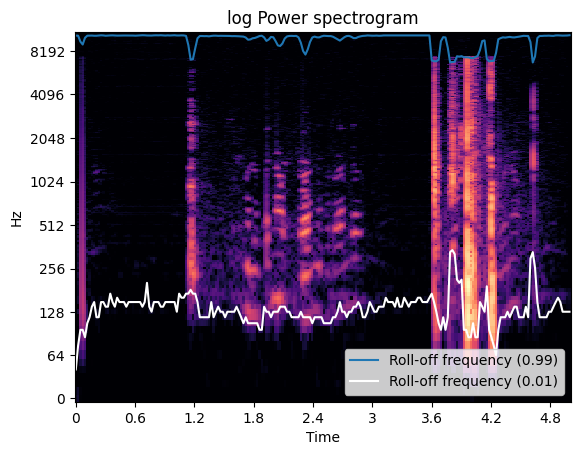

In [52]:
fig, ax = plt.subplots()
librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [53]:
guardarimagen(SpecRollOff_path_export,'Spectral Rolloff',fig)
plt.close()

## Poly Features

In [54]:
p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

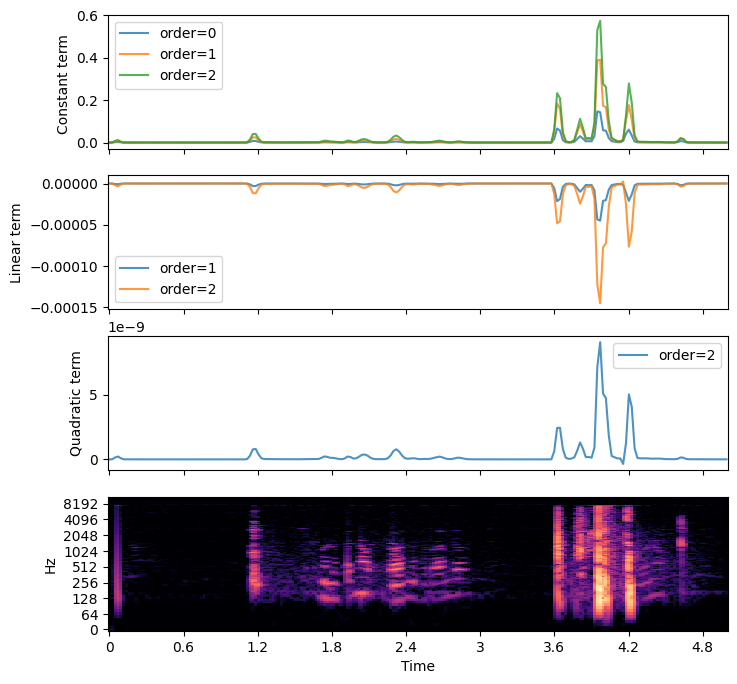

In [55]:
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

In [56]:
guardarimagen(PolyFeatures_path_export,'Poly features',fig)
plt.close()

## Tonnetz

In [57]:
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
tonnetz

array([[ 0.0239813 ,  0.08148701,  0.03677964, ...,  0.06533052,
         0.07816091,  0.06176978],
       [-0.00490739,  0.03799875,  0.05769303, ..., -0.00020472,
        -0.02276848, -0.02288907],
       [-0.00393128,  0.02485605, -0.03695292, ..., -0.04237251,
        -0.02267299, -0.03613285],
       [ 0.05434986,  0.02568632,  0.04742657, ...,  0.11684397,
         0.08067961,  0.06622216],
       [-0.00843701,  0.00102094,  0.01598877, ...,  0.00966033,
        -0.00757103,  0.00522941],
       [-0.00369039, -0.00294378, -0.00092569, ..., -0.03820769,
        -0.03940692, -0.04033111]])

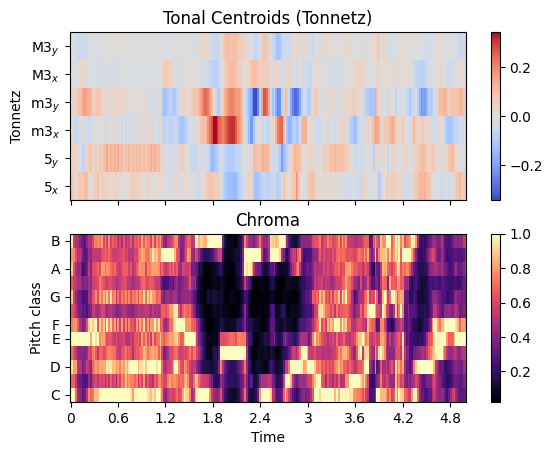

In [58]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [59]:
guardarimagen(Tonnetz_path_export,'Tonnetz',fig)
plt.close()